<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Global-Constants" data-toc-modified-id="Global-Constants-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Global Constants</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Data.Info" data-toc-modified-id="Data.Info-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Data.Info</a></span></li><li><span><a href="#Data.Licenses" data-toc-modified-id="Data.Licenses-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data.Licenses</a></span></li><li><span><a href="#Data.Categories" data-toc-modified-id="Data.Categories-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data.Categories</a></span></li><li><span><a href="#Data.RawChinese" data-toc-modified-id="Data.RawChinese-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Data.RawChinese</a></span></li><li><span><a href="#Data.Images" data-toc-modified-id="Data.Images-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Data.Images</a></span></li><li><span><a href="#Data.Annotations" data-toc-modified-id="Data.Annotations-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Data.Annotations</a></span></li></ul></li><li><span><a href="#Sample-Display" data-toc-modified-id="Sample-Display-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sample Display</a></span></li><li><span><a href="#Yolov5-Format-(Sample)" data-toc-modified-id="Yolov5-Format-(Sample)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Yolov5 Format (Sample)</a></span><ul class="toc-item"><li><span><a href="#Filter-Sample-Categories" data-toc-modified-id="Filter-Sample-Categories-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Filter Sample Categories</a></span></li><li><span><a href="#Filter-Sample-Annotations" data-toc-modified-id="Filter-Sample-Annotations-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Filter Sample Annotations</a></span></li><li><span><a href="#Filter-Sample-Images" data-toc-modified-id="Filter-Sample-Images-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Filter Sample Images</a></span></li><li><span><a href="#Covert-Yolov5-Annotation" data-toc-modified-id="Covert-Yolov5-Annotation-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Covert Yolov5 Annotation</a></span></li></ul></li><li><span><a href="#Covert-Yolov5-Format-Function" data-toc-modified-id="Covert-Yolov5-Format-Function-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Covert Yolov5 Format Function</a></span></li></ul></div>

In [1]:
! [ ! -L /kaggle ] && ln -s /data/kaggle /kaggle 

In [2]:
%config IPCompleter.use_jedi = False

In [3]:
import os
import shutil
import random
import json
import pandas as pd
import cv2
import matplotlib.pyplot as plt

from IPython.display import HTML, display
from PIL import Image

%matplotlib inline

pd.set_option("display.precision", 3)
pd.set_option("display.expand_frame_repr", False)
pd.set_option("display.max_rows", 50)
pd.set_option('max_colwidth',100)
pd.get_option('min_rows')

10

In [4]:
display(HTML('<style>.container { width:90% !important; }</style>'))

## Global Constants

In [5]:
DATA_ROOT = '/kaggle/input/retail_product_checkout'
WORK_ROOT = '/kaggle/working/retail_product_checkout'

In [6]:
!ls -l $DATA_ROOT
!mkdir -p $WORK_ROOT

total 13728
-rw-rw-rw- 1 1002 1002 14041410 Oct 17  2019 instances_val2019.json
drwxr-xr-x 2 1002 1002    12288 Mar 15 18:32 val2019


## Prepare Data

In [7]:
def load_json(jfile):
    with open(jfile, 'rb') as f:
        return json.load(f)
val_data = load_json(os.path.join(DATA_ROOT, 'instances_val2019.json'))
val_data.keys()

dict_keys(['info', 'licenses', 'categories', '__raw_Chinese_name_df', 'images', 'annotations'])

### Data.Info

In [8]:
val_data['info']

{'description': 'RPC: A Large-Scale Retail Product Checkout Dataset',
 'url': 'http://RPC-Dataset.github.io',
 'version': '1.1',
 'year': 2019,
 'contributor': 'Megvii Research Nanjing',
 'date_created': '2019/01/09',
 'dataset_license': [{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
   'id': 1,
   'name': 'Attribution-NonCommercial-ShareAlike License'}]}

### Data.Licenses

In [9]:
val_data['licenses']

[{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
  'id': 1,
  'name': 'Attribution-NonCommercial-ShareAlike License'}]

### Data.Categories

In [10]:
val_categories_df = pd.DataFrame(val_data['categories'])
val_categories_df.tail()

,supercategory,id,name
195,stationery,196,196_stationery
196,stationery,197,197_stationery
197,stationery,198,198_stationery
198,stationery,199,199_stationery
199,stationery,200,200_stationery


In [11]:
val_categories_grp = val_categories_df.groupby('supercategory', as_index=False)
val_categories_grp.groups

{'alcohol': [78, 79, 87, 88, 89, 90, 91, 92, 93, 94, 95], 'candy': [141, 142, 143, 144, 145, 146, 147, 148, 149, 150], 'canned_food': [107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120], 'chocolate': [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132], 'dessert': [53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69], 'dried_food': [21, 22, 23, 24, 25, 26, 27, 28, 29], 'dried_fruit': [12, 13, 14, 15, 16, 17, 18, 19, 20], 'drink': [70, 71, 72, 73, 74, 75, 76, 77, 80, 81, 82, 83, 84, 85, 86], 'gum': [133, 134, 135, 136, 137, 138, 139, 140], 'instant_drink': [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40], 'instant_noodles': [41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52], 'milk': [96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106], 'personal_hygiene': [163, 164, 165, 166, 167, 168, 169, 170, 171, 172], 'puffed_food': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], 'seasoner': [151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162], 'stationery': [193,

### Data.RawChinese

In [12]:
val_rawcat_df = pd.DataFrame(val_data['__raw_Chinese_name_df'])
val_rawcat_df.groupby(['sku_class', 'clas'], as_index=False).size()

,sku_class,clas,size
0,alcohol,酒,11
1,candy,糖果,10
2,canned_food,罐头,14
3,chocolate,巧克力,12
4,dessert,饼干点心,17
5,dried_food,干货,9
6,dried_fruit,果仁果脯,9
7,drink,饮料,15
8,gum,口香糖,8
9,instant_drink,冲调,11


In [13]:
pd.set_option("display.max_rows", None)
val_rawcat_df.groupby(['sku_class', 'clas', 'sku_name']).first()

category_id           code  shelf  num                name  known  ind
sku_class        clas sku_name                                                                                    
alcohol          酒    79_alcohol                     79  6953029710112      3    3           喜力啤酒500ml   True   78
                      80_alcohol                     80  6948960100009      3    3           百威啤酒600ml   True   79
                      88_alcohol                     88  6935145301030      3    5      RIO果酒水蜜桃味275ml  False   87
                      89_alcohol                     89  6935145301047      3    5   RIO果酒蓝玫瑰威士忌味275ml   True   88
                      90_alcohol                     90  6906151601353      3    5         牛栏山二锅头100ml  False   89
                      91_alcohol                     91  6948960100429      3    6          哈尔滨啤酒330ml  False   90
                      92_alcohol                     92  6901035613699      3    6           青岛啤酒330ml   True   91
                      93_alcohol                     93  6949352201106      3    6           雪花啤酒330ml   True   92
                      94_alcohol                     94  6948960100993      3    3          哈尔滨啤酒500ml   True   93
                      95_alcohol                     95  8410793186126      3    6        KELER啤酒500ml   True   94
                      96_alcohol                     96  6948960100078      3    3           百威啤酒500ml   True   95
candy            糖果   142_candy                     142  6911316101043      4    4      比巴卜棉花泡泡糖可乐味11g   True  141
                      143_candy                     143  6911316101012      4    6      比巴卜棉花泡泡堂葡萄味11g   True  142
                      144_candy                     144  6923450663981      4    4          星爆缤纷原果味25g   True  143
                      145_candy                     145  6911316510005      4    5      阿尔卑斯焦香牛奶味硬糖45g   True  144
                      146_candy                     146  6911316380288      4    5    阿尔卑斯牛奶软糖黄桃酸奶味47g  False  145
                      147_candy                     147  6911316380271      4    5    阿尔卑斯牛奶软糖蓝莓酸奶味47g  False  146
                      148_candy                     148  6901424286213      4    5           王老吉润喉糖28g   True  147
                      149_candy                     149  6907992632483      4    4         伊利牛奶片蓝莓味32g   True  148
                      150_candy                     150  6914782114371      4    5      熊博士口嚼糖草莓牛奶味52g   True  149
                      151_candy                     151  6923450603550      4    5           彩虹糖原果味45g   True  150
canned_food      罐头   108_canned_food               108  6911988011985      3    5         达利园桂圆莲子360g   True  107
                      109_canned_food               109  6926892562096      3    5        银鹭冰糖百合银耳280g   True  108
                      110_canned_food               110  6923523998019      3    5         喜多多什锦椰果567g  False  109
                      111_canned_food               111  4800009004827      3    5           都乐菠萝块567g  False  110
                      112_canned_food               112    38900004095      3    5           都乐菠萝块234g  False  111
                      113_canned_food               113  6926892567084      3    5         银鹭薏仁红豆粥280g   True  112
                      114_canned_food               114  6926892565080      3    5         银鹭莲子玉米粥280g  False  113
                      115_canned_food               115  6926892501033      3    5         银鹭紫薯紫米粥280g   True  114
                      116_canned_food               116  6926892568081      3    5         银鹭椰奶燕麦粥280g   True  115
                      117_canned_food               117  6926892562003      3    5          银鹭黑糖桂圆280g   True  116
                      118_canned_food               118  6902131110167      3    5           梅林午餐肉340g  False  117
                      119_canned_food               119  6916880292012      3    4         珠江桥牌豆豉鱼150g   True  118
                   

In [14]:
val_rawcat_df[val_rawcat_df['sku_class'] == 'drink']

,sku_name,category_id,sku_class,code,shelf,num,name,clas,known,ind
70,71_drink,71,drink,6921168509256,3,5,农夫山泉矿泉水550ml,饮料,True,70
71,72_drink,72,drink,6901285991219,3,5,怡宝矿泉水555ml,饮料,True,71
72,73_drink,73,drink,6928804010114,3,5,可口可乐零度500ml,饮料,False,72
73,74_drink,74,drink,6928804011173,3,5,可口可乐500ml,饮料,False,73
74,75_drink,75,drink,6924882496116,3,5,百事可乐600ml,饮料,True,74
75,76_drink,76,drink,6928804011456,3,5,芬达苹果味500ml,饮料,True,75
76,77_drink,77,drink,6928804011326,3,5,芬达橙味500ml,饮料,True,76
77,78_drink,78,drink,6928804010220,3,5,雪碧500ml,饮料,True,77
80,81_drink,81,drink,6924882486100,3,5,百事可乐330ml,饮料,False,80
81,82_drink,82,drink,6928804011142,3,5,可口可乐330ml,饮料,False,81


In [15]:
pd.reset_option("display.min_rows")
pd.reset_option("display.max_rows")

### Data.Images

In [16]:
val_images_df = pd.DataFrame(val_data['images'])
print(len(val_images_df))
val_images_df[17:23]

6000


,file_name,width,height,id,level
17,20180828-15-15-47-946.jpg,1815,1815,275,easy
18,20180828-15-15-57-946.jpg,1815,1815,276,easy
19,20180828-15-16-04-946.jpg,1818,1818,277,easy
20,20180828-15-27-03-1196.jpg,1847,1847,278,easy
21,20180828-15-27-08-1196.jpg,1850,1850,279,easy
22,20180828-15-27-17-1196.jpg,1843,1843,280,easy


In [17]:
val_images_df[['width', 'height']].describe()

,width,height
count,6000.000,6000.000
mean,1830.739,1830.739
std,20.213,20.213
min,1751.000,1751.000
25%,1817.000,1817.000
50%,1833.000,1833.000
75%,1846.000,1846.000
max,1887.000,1887.000


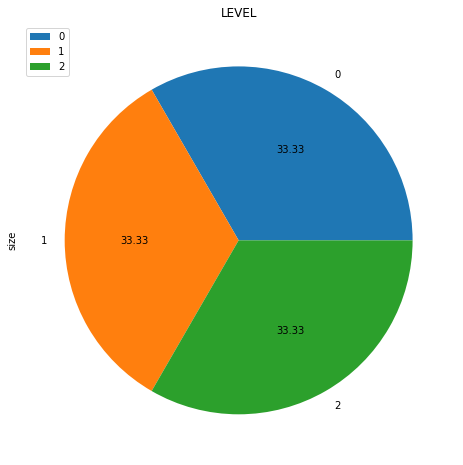

In [18]:
val_images_df.groupby(['level'], as_index=False).size().plot.pie(figsize=(8,8), y='size', autopct='%.2f', title='LEVEL');

### Data.Annotations

In [19]:
val_anns_df = pd.DataFrame(val_data['annotations'])
print(len(val_anns_df))
val_anns_df[17:23]

73602


,area,bbox,category_id,id,image_id,iscrowd,segmentation,point_xy
17,96308.00,"[851.42, 756.71, 403.28, 238.81]",60,768,224,0,[[]],"[1053.06, 876.12]"
18,78450.11,"[848.04, 1020.31, 330.06, 237.69]",33,769,224,0,[[]],"[1013.07, 1139.15]"
19,96182.63,"[566.08, 712.83, 256.97, 374.29]",152,770,224,0,[[]],"[694.57, 899.98]"
20,341530.16,"[928.69, 218.65, 505.05, 676.22]",23,783,228,0,[[]],"[1181.22, 556.76]"
21,362831.21,"[996.31, 685.67, 528.3, 686.79]",23,784,228,0,[[]],"[1260.46, 1029.07]"
22,586567.56,"[400.39, 698.35, 659.32, 889.66]",24,785,228,0,[[]],"[730.05, 1143.18]"


## Sample Display

In [20]:
val_images_0824_df = val_images_df[val_images_df['file_name'].str.contains('20180824')]
val_images_0824_df.head()

,file_name,width,height,id,level
84,20180824-14-02-57-411.jpg,1866,1866,613,easy
85,20180824-14-03-11-411.jpg,1873,1873,614,easy
86,20180824-14-03-18-411.jpg,1865,1865,615,easy
102,20180824-13-54-50-406.jpg,1865,1865,672,easy
103,20180824-13-55-03-406.jpg,1871,1871,673,easy


In [21]:
val_sample_img0_info = val_images_0824_df.iloc[0]
val_sample_img0_info

file_name    20180824-14-02-57-411.jpg
width                             1866
height                            1866
id                                 613
level                             easy
Name: 84, dtype: object

In [22]:
val_sample_img0_fpath = f'{DATA_ROOT}/val2019/{val_sample_img0_info.file_name}'
if not os.path.exists(val_sample_img0_fpath):
    raise RuntimeError(f'Not found {val_sample_img0_fpath}')
val_sample_img0_fpath

'/kaggle/input/retail_product_checkout/val2019/20180824-14-02-57-411.jpg'

In [23]:
val_sample_img0_anns = val_anns_df[val_anns_df['image_id'] == val_sample_img0_info.id]
val_sample_img0_anns

,area,bbox,category_id,id,image_id,iscrowd,segmentation,point_xy
336,140536.14,"[180.71, 696.86, 306.71, 458.21]",181,2323,613,0,[[]],"[334.06, 925.97]"
337,102002.08,"[164.08, 1173.55, 306.71, 332.57]",130,2324,613,0,[[]],"[317.44, 1339.84]"
338,152941.62,"[819.99, 933.36, 242.04, 631.89]",75,2325,613,0,[[]],"[941.01, 1249.31]"
339,29850.30,"[1057.53, 1300.65, 122.67, 243.34]",144,2326,613,0,[[]],"[1118.87, 1422.32]"


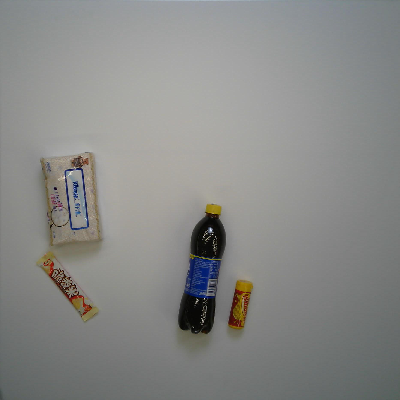

In [24]:
val_sample_img0_pil = Image.open(val_sample_img0_fpath, 'r')
val_sample_img0_pil.resize((400, 400))

In [25]:
def annotate_image(image_path, anns, resize=True):
    img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)

    for i, a in anns.iterrows():
        xmin, ymin, width, height = a.bbox
        xmax, ymax = xmin + width, ymin + height
        xpoint, ypoint = a.point_xy
        xpoint, ypoint = int(xpoint), int(ypoint)
        cv2.rectangle(img, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 255, 255), 2)
        cv2.rectangle(img, (xpoint-20, ypoint-20), (xpoint + 20, ypoint + 20), (0, 255, 0), 5)

    if not resize:
        return img

    return cv2.resize(img, (200, 200), interpolation = cv2.INTER_AREA)

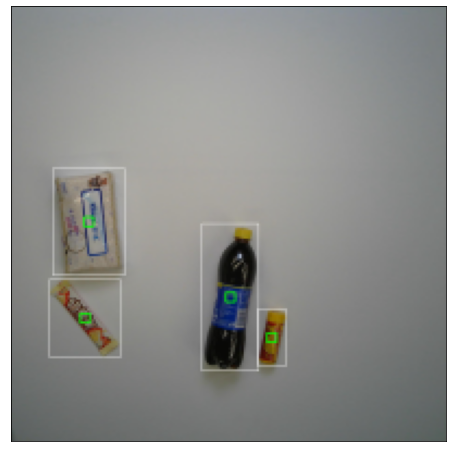

In [26]:
val_sample_img0_cv2 = annotate_image(val_sample_img0_fpath, val_sample_img0_anns, True)
plt.figure(figsize=(12, 8))
plt.xticks([])
plt.yticks([])
plt.imshow(val_sample_img0_cv2);

In [27]:
random3x3_rows = random.sample(range(1, len(val_images_0824_df)), 9)
val_images_0824_df.iloc[random3x3_rows]

,file_name,width,height,id,level
1124,20180824-14-37-36-431.jpg,1842,1842,5665,easy
1250,20180824-17-14-50-536.jpg,1855,1855,6172,easy
721,20180824-14-48-28-31.jpg,1834,1834,3617,easy
1132,20180824-16-59-46-81.jpg,1826,1826,5681,easy
107,20180824-14-09-24-416.jpg,1862,1862,685,easy
116,20180824-14-52-07-441.jpg,1847,1847,705,easy
124,20180824-15-51-05-56.jpg,1850,1850,728,easy
399,20180824-16-15-14-496.jpg,1858,1858,1902,easy
1125,20180824-14-37-46-431.jpg,1839,1839,5666,easy


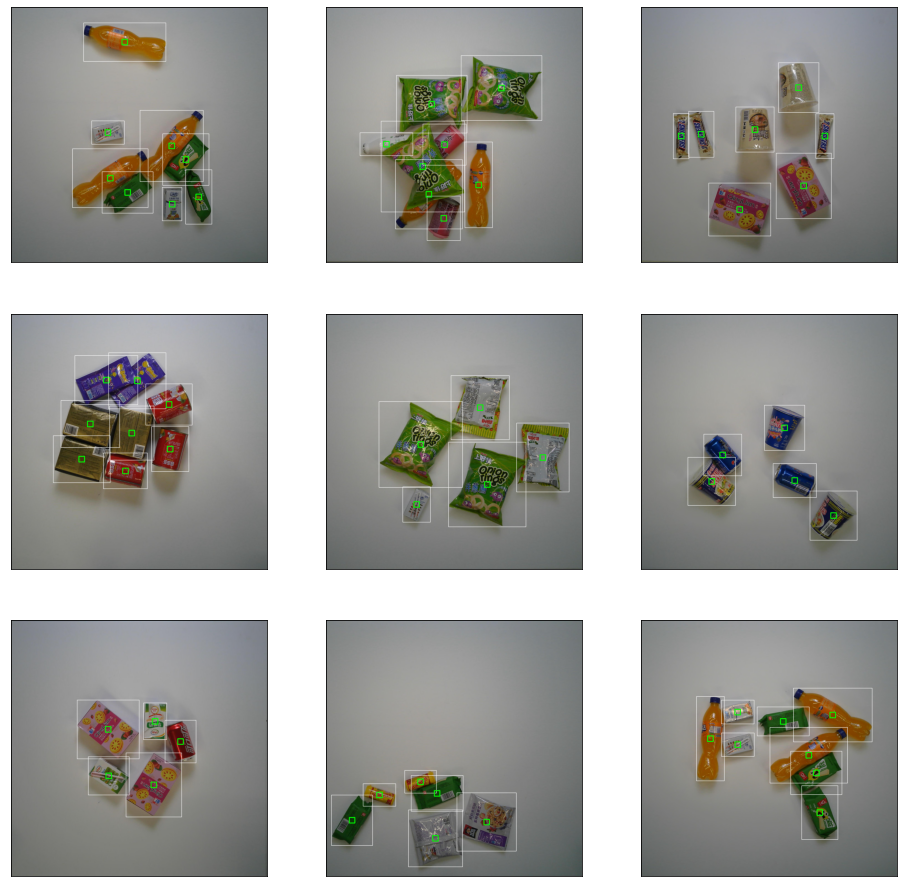

In [28]:
plt.figure(figsize=(16,16))
i = 1
for _, item in val_images_0824_df.iloc[random3x3_rows].iterrows():
    img_path = f'{DATA_ROOT}/val2019/{item.file_name}'
    if not os.path.exists(img_path):
        raise RuntimeError(f'Not found {img_path}')
    anns = val_anns_df[val_anns_df['image_id'] == item.id]
    plt.subplot(3, 3, i)
    plt.xticks([])
    plt.yticks([])
    img_cv2 = annotate_image(img_path, anns, False)
    plt.imshow(img_cv2)
    i += 1

## Yolov5 Format (Sample)

### Filter Sample Categories

In [29]:
sample_ids = [34, 71, 74, 77, 78, 83]

In [30]:
sample_rawcat = val_rawcat_df[val_rawcat_df['category_id'].isin(sample_ids)].set_index('category_id')
sample_rawcat

,sku_name,sku_class,code,shelf,num,name,clas,known,ind
category_id,,,,,,,,,
34,34_instant_drink,instant_drink,6926475206263,2,4,优乐美红豆奶茶65g,冲调,False,33
71,71_drink,drink,6921168509256,3,5,农夫山泉矿泉水550ml,饮料,True,70
74,74_drink,drink,6928804011173,3,5,可口可乐500ml,饮料,False,73
77,77_drink,drink,6928804011326,3,5,芬达橙味500ml,饮料,True,76
78,78_drink,drink,6928804010220,3,5,雪碧500ml,饮料,True,77
83,83_drink,drink,6956367338680,3,5,王老吉310ml,饮料,True,82


In [31]:
sample_classes = sample_rawcat['name'].values.tolist()
sample_classes

['优乐美红豆奶茶65g', '农夫山泉矿泉水550ml', '可口可乐500ml', '芬达橙味500ml', '雪碧500ml', '王老吉310ml']

In [32]:
list(zip(sample_ids, sample_classes))

[(34, '优乐美红豆奶茶65g'),
 (71, '农夫山泉矿泉水550ml'),
 (74, '可口可乐500ml'),
 (77, '芬达橙味500ml'),
 (78, '雪碧500ml'),
 (83, '王老吉310ml')]

### Filter Sample Annotations 

In [48]:
sample_anns = val_anns_df[val_anns_df['category_id'].isin(sample_ids)].set_index('id')
sample_anns.tail()

,area,bbox,category_id,image_id,iscrowd,segmentation,point_xy
id,,,,,,,
375503,103908.43,"[507.38, 740.96, 170.15, 610.69]",78,30590,0,[[]],"[592.46, 1046.31]"
375504,110352.43,"[343.83, 665.78, 180.7, 610.69]",78,30590,0,[[]],"[434.18, 971.12]"
375950,137788.92,"[1476.83, 697.08, 219.27, 628.4]",78,30613,0,[[]],"[1586.46, 1011.28]"
375970,121442.16,"[1146.48, 210.75, 202.24, 600.48]",78,30614,0,[[]],"[1247.6, 510.99]"
375992,126698.55,"[1149.04, 208.4, 206.68, 613.01]",78,30615,0,[[]],"[1252.38, 514.9]"


### Filter Sample Images

In [34]:
sample_image_ids = sample_anns['image_id'].unique().tolist()
len(sample_image_ids), sample_image_ids[-10:]

(1098, [30502, 30556, 30557, 30558, 30588, 30589, 30590, 30613, 30614, 30615])

In [35]:
sample_images = val_images_df[val_images_df['id'].isin(sample_image_ids)]
sample_images.tail()

,file_name,width,height,id,level
5990,20181023-14-13-36-21.jpg,1838,1838,30589,hard
5991,20181023-14-13-56-21.jpg,1811,1811,30590,hard
5996,20181024-15-37-14-136.jpg,1821,1821,30613,hard
5997,20181024-15-37-31-136.jpg,1832,1832,30614,hard
5998,20181024-15-37-46-136.jpg,1830,1830,30615,hard


### Covert Yolov5 Annotation

In [36]:
SAMPLE_IN_IMAGES_PATH = f'{DATA_ROOT}/val2019'

SAMPLE_OUT_IMAGES_PATH = f'{WORK_ROOT}/images/val'
SAMPLE_OUT_LABELS_PATH = f'{WORK_ROOT}/labels/val'

os.makedirs(SAMPLE_OUT_IMAGES_PATH, exist_ok=True)
os.makedirs(SAMPLE_OUT_LABELS_PATH, exist_ok=True)

for _, item in sample_images.iterrows():
    imgw, imgh = item.width, item.height
    dw, dh = 1.0 / imgw, 1.0 / imgh
    img_src_path = os.path.join(SAMPLE_IN_IMAGES_PATH, item.file_name)
    if not os.path.exists(img_src_path):
        continue
    img_dst_path = os.path.join(SAMPLE_OUT_IMAGES_PATH, item.file_name)
    lab_dst_path = os.path.join(SAMPLE_OUT_LABELS_PATH, item.file_name.replace('.jpg', '.txt'))
    anns = sample_anns[sample_anns['image_id'] == item.id]
    labs = []
    for _, ann in anns.iterrows():
        cls_id = sample_ids.index(ann.category_id)
        cx, cy = dw * ann.point_xy[0], dh  * ann.point_xy[1]
        sw, sh = dw * ann.bbox[2], dh * ann.bbox[3]
        labs.append('%d %.6f %.6f %.6f %.6f' % (cls_id, cx, cy, sw, sh))
    with open(lab_dst_path, 'w') as fw:
        fw.write('\n'.join(labs))
    shutil.copyfile(img_src_path, img_dst_path)

In [37]:
!tree {WORK_ROOT} -d

/kaggle/working/retail_product_checkout
├── images
│   └── val
└── labels
    └── val

4 directories


## Covert Yolov5 Format Function

In [58]:
def convert_annotation(phase, in_dir, out_dir, sample_ids):
    in_images_path  = f'{in_dir}/{phase}2019'
    out_images_path = f'{out_dir}/images/{phase}'
    out_labels_path = f'{out_dir}/labels/{phase}'
    
    os.makedirs(out_images_path, exist_ok=True)
    os.makedirs(out_labels_path, exist_ok=True)
    
    # 1. load json desc
    with open(os.path.join(f'{in_dir}/instances_{phase}2019.json'), 'rb') as f:
        data = json.load(f)
        
    imgs_df = pd.DataFrame(data['images'])
    anns_df = pd.DataFrame(data['annotations'])
    
    # 2. filter category id
    anns_df = anns_df[anns_df['category_id'].isin(sample_ids)]
    
    # 3. filter image id
    img_ids = anns_df['image_id'].unique()
    imgs_df = imgs_df[imgs_df['id'].isin(img_ids)]
    
    # 4. covert yolov5 format
    for _, item in imgs_df.iterrows():
        imgw, imgh = item.width, item.height
        ## 4.1 normalize scale
        dw, dh = 1.0 / imgw, 1.0 / imgh
        img_src_path = os.path.join(in_images_path, item.file_name)
        if not os.path.exists(img_src_path):
            continue
        img_dst_path = os.path.join(out_images_path, item.file_name)
        lab_dst_path = os.path.join(out_labels_path, item.file_name.replace('.jpg', '.txt'))
        ## 4.2 annotation in this image
        anns = anns_df[anns_df['image_id'] == item.id]
        labs = []
        for _, ann in anns.iterrows():
            ## 4.3 convert bbox
            cls_id = sample_ids.index(ann.category_id)
            cx, cy = dw * ann.point_xy[0], dh * ann.point_xy[1]
            sw, sh = dw * ann.bbox[2], dh * ann.bbox[3]
            labs.append('%d %.6f %.6f %.6f %.6f' % (cls_id, cx, cy, sw, sh))
        ## 4.4 save to file
        with open(lab_dst_path, 'w') as fw:
            fw.write('\n'.join(labs))
        ## 4.5 copy image to out dir
        shutil.copyfile(img_src_path, img_dst_path)

In [59]:
convert_annotation('val', DATA_ROOT, WORK_ROOT, sample_ids)

,file_name,width,height,id,level
33,20180829-13-57-28-1341.jpg,1815,1815,334,easy
34,20180829-13-57-37-1341.jpg,1815,1815,335,easy
35,20180829-13-57-42-1341.jpg,1805,1805,336,easy
36,20180829-16-16-28-1801.jpg,1845,1845,345,easy
37,20180829-16-16-35-1801.jpg,1852,1852,346,easy
...,...,...,...,...,...
5990,20181023-14-13-36-21.jpg,1838,1838,30589,hard
5991,20181023-14-13-56-21.jpg,1811,1811,30590,hard
5996,20181024-15-37-14-136.jpg,1821,1821,30613,hard
5997,20181024-15-37-31-136.jpg,1832,1832,30614,hard
